In [1]:
import pandas as pd

In [2]:
%ls  flutter_data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 943C-0871

 C:\Users\kumi1\Desktop\chart\flutter_data 디렉터리

2020-09-03  오전 07:34    <DIR>          .
2020-09-03  오전 07:34    <DIR>          ..
2020-09-03  오전 07:34    <DIR>          agg_hour
2020-09-03  오전 07:40    <DIR>          result
               0개 파일                   0 바이트
               4개 디렉터리  211,071,447,040 바이트 남음


In [3]:
import os

def concat_data(df_origin, filename):
    df_new = pd.read_json(filename)
    df_origin = pd.concat([df_origin, df_new], ignore_index=True)
    return df_origin

def check_date(filename):
    year, month, date, hour, minute = filename.split('_')
    print(year, month, date, hour, minute)

def search(dirname):
    filenames = os.listdir(dirname)
    df = pd.DataFrame()
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        if '2020_7_26_17' in filename:
            check_date(filename)
            df = concat_data(df, full_filename)
    return df

def search2(dirname, date):
    filenames = os.listdir(dirname)
    df = pd.DataFrame()
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        if date in filename:
            df = concat_data(df, full_filename)
            break
    return df


In [4]:
pre_value = 0
def get_active_pedometer(value):
    if value == 0:
        return 0
    else:
        global pre_value    
        result = 0
        if value-pre_value > 0:
            result = value-pre_value
        pre_value = value
        
        if result > 100: return 0
        else: return result

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc("font", family="Malgun Gothic")

In [9]:
import math
# test_df.drop(columns=['indexes'], inplace=True)
minutes = [str(x) for x in range(10, 60)]
minutes.insert(0, '09')
minutes.insert(0, '08')
minutes.insert(0, '07')
minutes.insert(0, '06')
minutes.insert(0, '05')
minutes.insert(0, '04')
minutes.insert(0, '03')
minutes.insert(0, '02')
minutes.insert(0, '01')
minutes.insert(0, '00')

hours = [str(x) for x in range(10, 24)]
hours.insert(0, '09')
hours.insert(0, '08')
hours.insert(0, '07')
hours.insert(0, '06')
hours.insert(0, '05')
hours.insert(0, '04')
hours.insert(0, '03')
hours.insert(0, '02')
hours.insert(0, '01')
hours.insert(0, '00')



def agg_by_minute(df, month, date, hour):
    new_df = pd.DataFrame()
    
    date_format = ''
    if len(month) == 1 and len(date) == 1:
        date_format = '2020-0{}-0{} {}:{}'
    elif len(month) == 1 and len(date) == 2:
        date_format = '2020-0{}-{} {}:{}'
    elif len(month) == 2 and len(date) == 1:
        date_format = '2020-{}-0{} {}:{}'
    else:
        date_format = '2020-{}-{} {}:{}'
    
    for minute in minutes:
        if minute != '00':
            df.drop(columns=['indexes'], inplace=True)
        df['indexes'] = df['time'].str.find(date_format.format(month, date, hour, minute))
#         print(date_format.format(month, date, hour, minute), len(df[df['indexes'] != -1] ))
        c = df[df['indexes'] != -1]['cumulative_pedometer'].mean()
        if not math.isnan(c): 
            c = int(c)
        
        p = df[df['indexes'] != -1]['pedometer'].mean()
        if not math.isnan(p): 
            p = int(p)
            
        a = df[df['indexes'] != -1]['active_pedometer'].mean()
        if not math.isnan(a):
            a = int(a)
        
        t = date_format.format(month, date, hour, minute)
        new_series = pd.Series(index=['pedometer', 'cumulative_pedometer', 'active_pedometer', 'time'], data=[p, c, a, t])
        new_df = new_df.append(new_series, ignore_index=True)
    return new_df

def agg_seconds_to_minute(month, date):    
    new_df = pd.DataFrame()
    
    filename = './flutter_data/result/2020_{}_{}.json'.format(month, date)
#     print(filename)
    df = pd.read_json(filename)
    
    df['cumulative_pedometer'] = df['pedometer'] - df['pedometer'][0]
    df['active_pedometer'] = df['cumulative_pedometer'].apply(lambda x : get_active_pedometer(x))
    
    for hour in hours:
        result = agg_by_minute(df, month, date, hour)
        new_df = new_df.append(result, ignore_index=True)
    return new_df

def agg_by_hour(df, month, date):
    new_df = pd.DataFrame()
    
    date_format = ''
    if len(month) == 1 and len(date) == 1:
        date_format = '2020-0{}-0{} {}'
    elif len(month) == 1 and len(date) == 2:
        date_format = '2020-0{}-{} {}'
    elif len(month) == 2 and len(date) == 1:
        date_format = '2020-{}-0{} {}'
    else:
        date_format = '2020-{}-{} {}'
        
    for hour in hours:
        if hour != '00':
            df.drop(columns=['indexes'], inplace=True)
        df['indexes'] = df['time'].str.find(date_format.format(month, date, hour))
#         print(date_format.format(month, date, hour), len(df[df['indexes'] != -1] ))
        c = df[df['indexes'] != -1]['cumulative_pedometer'].mean()
        if not math.isnan(c): 
            c = int(c)
        else:
            c = 0
            
        p = df[df['indexes'] != -1]['pedometer'].mean()
        if not math.isnan(p): 
            p = int(p)
        else:
            p = 0
            
        a = df[df['indexes'] != -1]['active_pedometer'].max()
        if not math.isnan(a):
            a = int(a)
        else:
            a = 0
        
        t = date_format.format(month, date, hour)
        new_series = pd.Series(index=['pedometer', 'cumulative_pedometer', 'active_pedometer', 'time'], data=[p, c, a, t])
        new_df = new_df.append(new_series, ignore_index=True)
    return new_df
    
def draw_pie_plot(df):
    fig, ax = plt.subplots()
    labels = get_labels()

    size = 0.2
    vals = np.array(get_val())

    cmap = plt.get_cmap('Greens')

    outer_colors = cmap(df['ratio'].tolist()[:24])

    ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels = labels, startangle=90, counterclock=False,
           wedgeprops=dict(width=size, edgecolor='w'))

    ax.set(aspect="equal", title='걸음')
    plt.legend(labels, loc='right', bbox_to_anchor=(1.0, 0., 0.5, 0.5))
    plt.show()


def get_val():
    result = []
    base = [10,10]
    for i in range(24):
        result.append(base)

    return result

def get_labels():
    result = []
    for i in range(24):
        result.append(str(i) + '시')
    return result

def exist_file(filename):
    filenames = os.listdir('./flutter_data/agg_hour')
    
    if filename in filenames:
        return True
    else:
        return False

In [10]:
filename = '2020_{}_{}_h.json'.format('8', '7')
exist_file(filename)

True

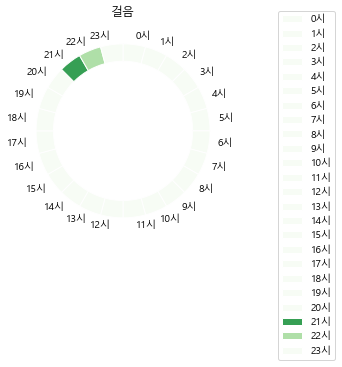

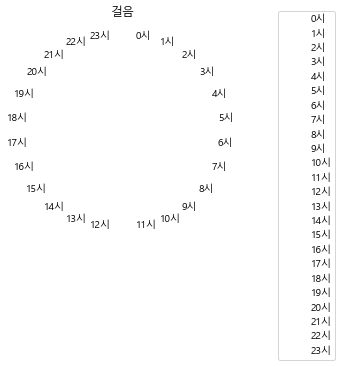

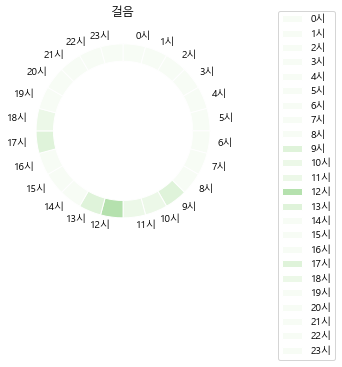

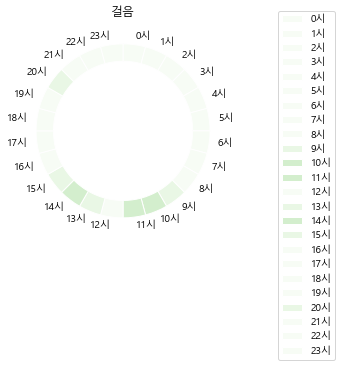

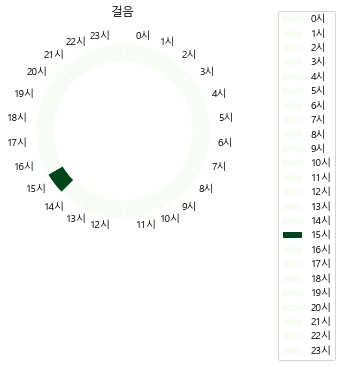

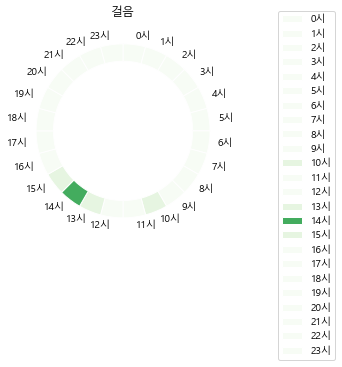

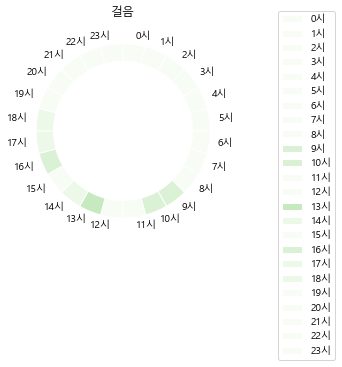

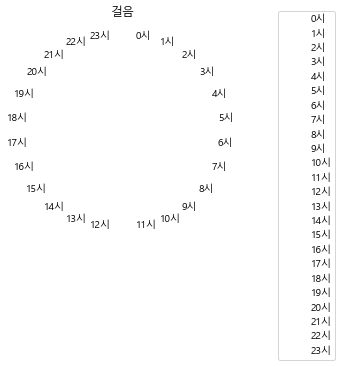

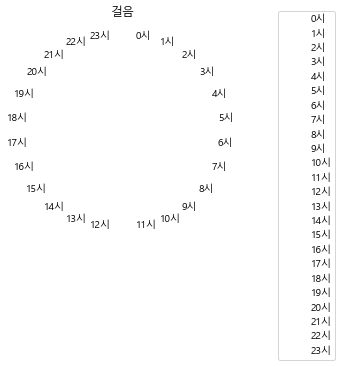

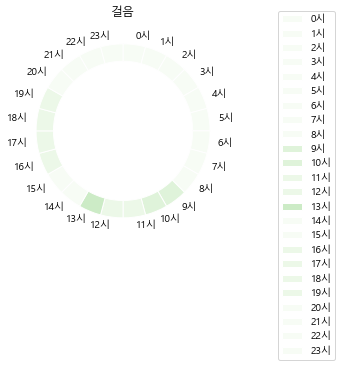

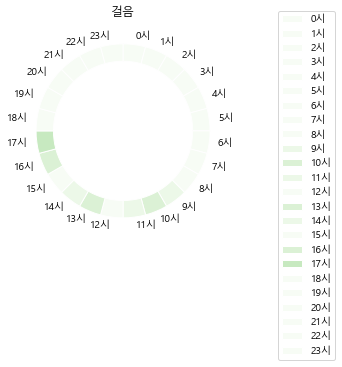

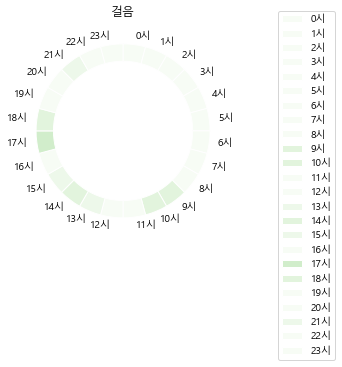

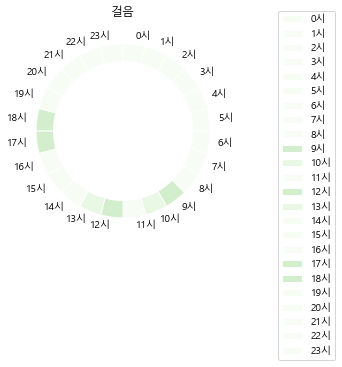

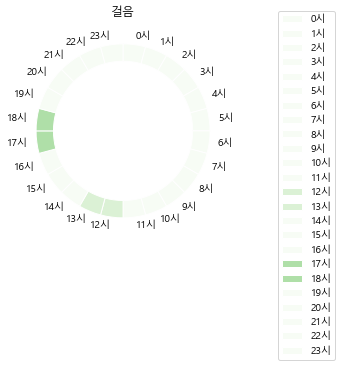

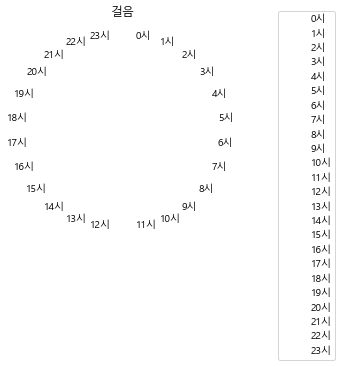

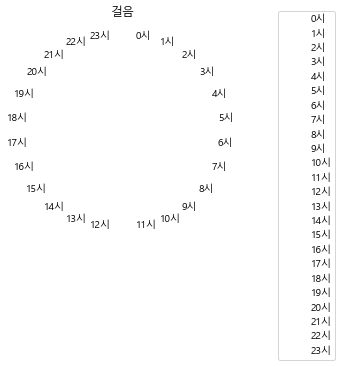

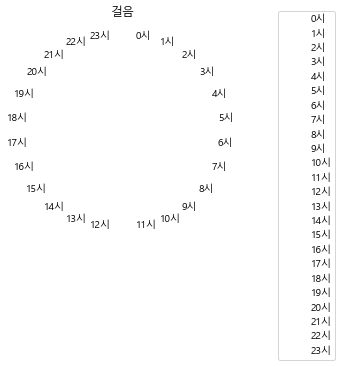

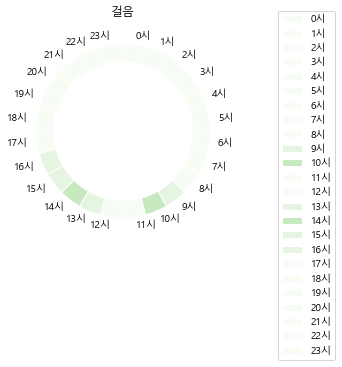

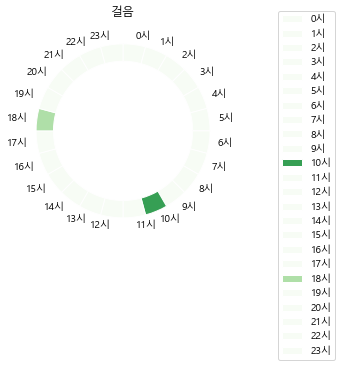

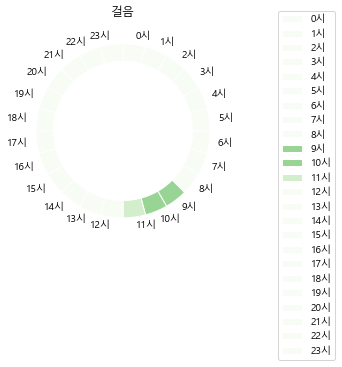

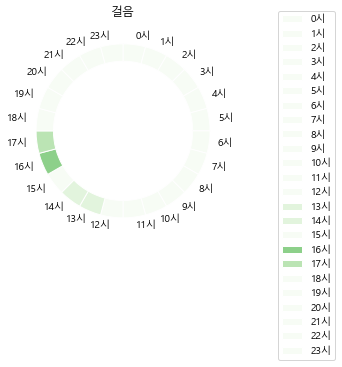

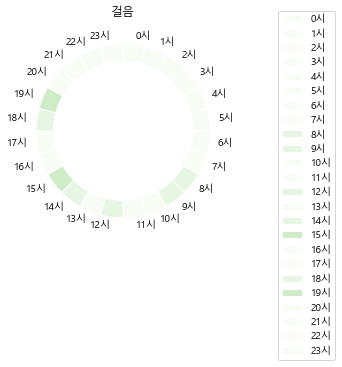

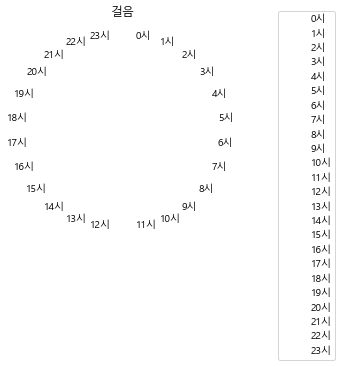

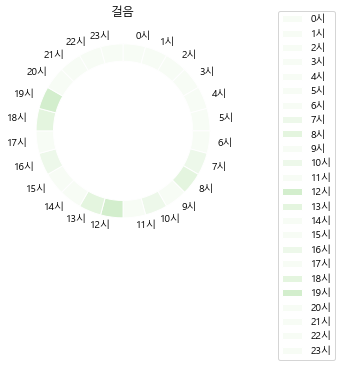

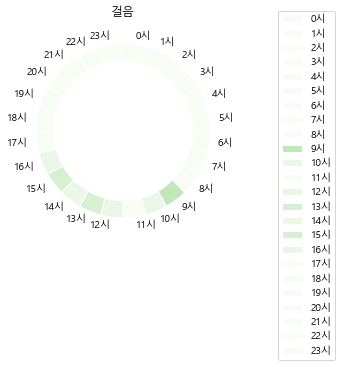

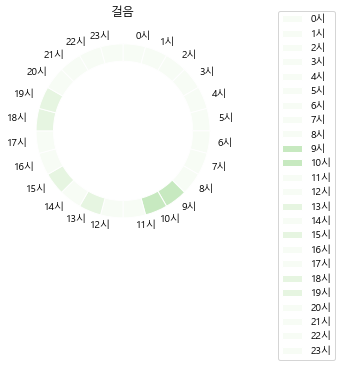

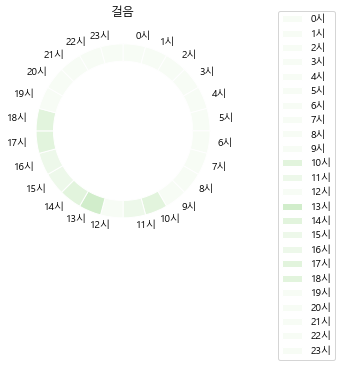

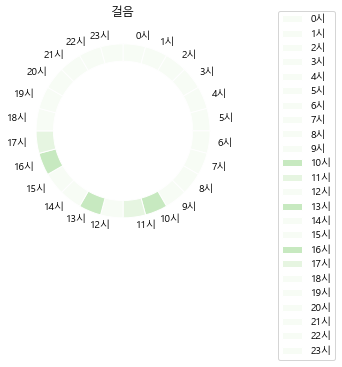

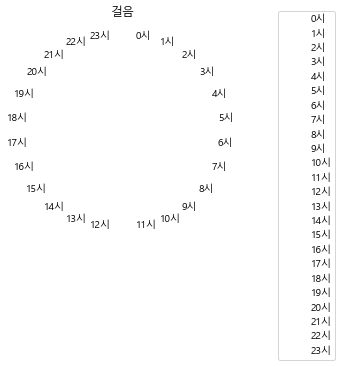

In [14]:
months = ['7', '8']
dates = [str(date) for date in range(1,30)]

for date in dates:
    filename = '2020_{}_{}_h.json'.format(months[1], date)
    if not exist_file(filename):
        agg_minute_result = agg_seconds_to_minute(months[1], date)
        agg_minute_result.to_json('./flutter_data/agg_hour/' + filename)

    minute_data = pd.read_json('./flutter_data/agg_hour/' + filename)
        
    agg_hour_result = agg_by_hour(minute_data, months[1], date)
    
    active_pedometer_sum = agg_hour_result['active_pedometer'].sum()
    agg_hour_result['ratio'] = agg_hour_result['active_pedometer'].apply(lambda x : x / active_pedometer_sum).round(2)
    
    draw_pie_plot(agg_hour_result)

In [53]:
active_pedometer_sum = res['active_pedometer'].sum()
res['ratio'] = res['active_pedometer'].apply(lambda x : x / active_pedometer_sum).round(2)
res['ratio'].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.17,
 0.17,
 0.0,
 0.0,
 0.25,
 0.08,
 0.0,
 0.17,
 0.08,
 0.08,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

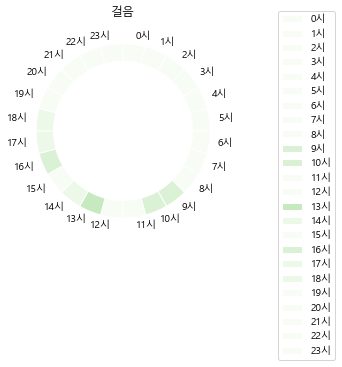

In [55]:
fig, ax = plt.subplots()
labels = get_labels()

size = 0.2
vals = np.array(get_val())

cmap = plt.get_cmap('Greens')

# outer_colors = cmap(seed)

# outer_colors = cmap(np.arange(3)*20)
# cmap은 0-1 사이의 색을 갖는다
# outer_colors = cmap([0,0,0,0,0,0,0,0.25,0.25,0.5,0.5,0.5, 0, 0.25,0,0,0.25,0,0.5, 0.5, 0,0,0,0,0,0,0,0])
outer_colors = cmap(res['ratio'].tolist())

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels = labels, startangle=90, counterclock=False,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='걸음')
plt.legend(labels, loc='right', bbox_to_anchor=(1.0, 0., 0.5, 0.5))
plt.show()


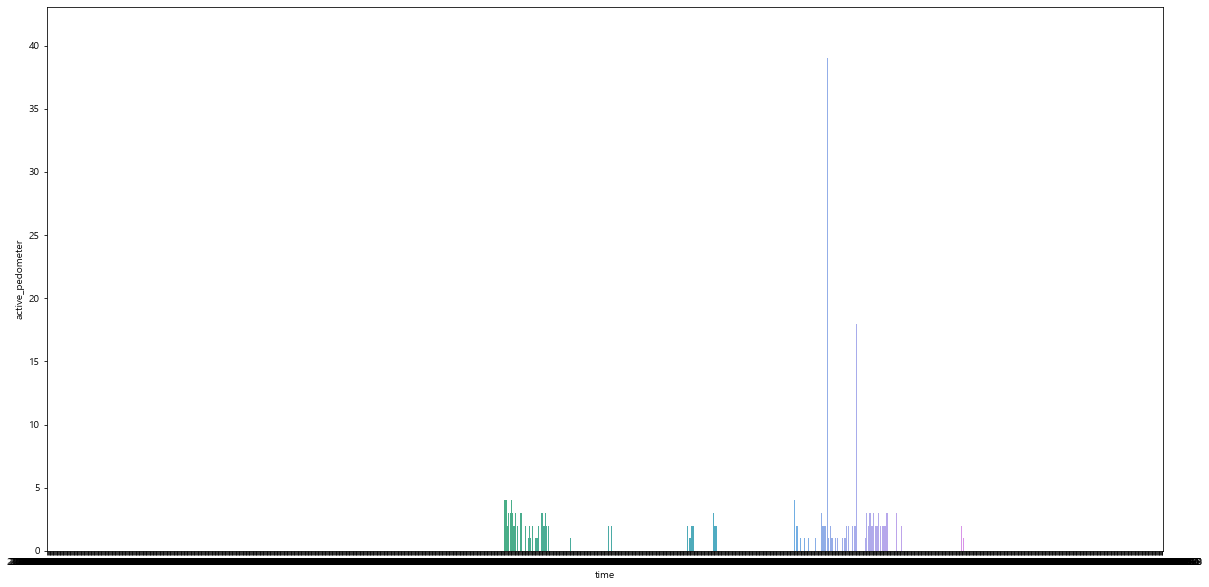

In [200]:
plt.figure(figsize=(20,10))
sns.barplot(data=result, x='time', y="active_pedometer", ci=None)

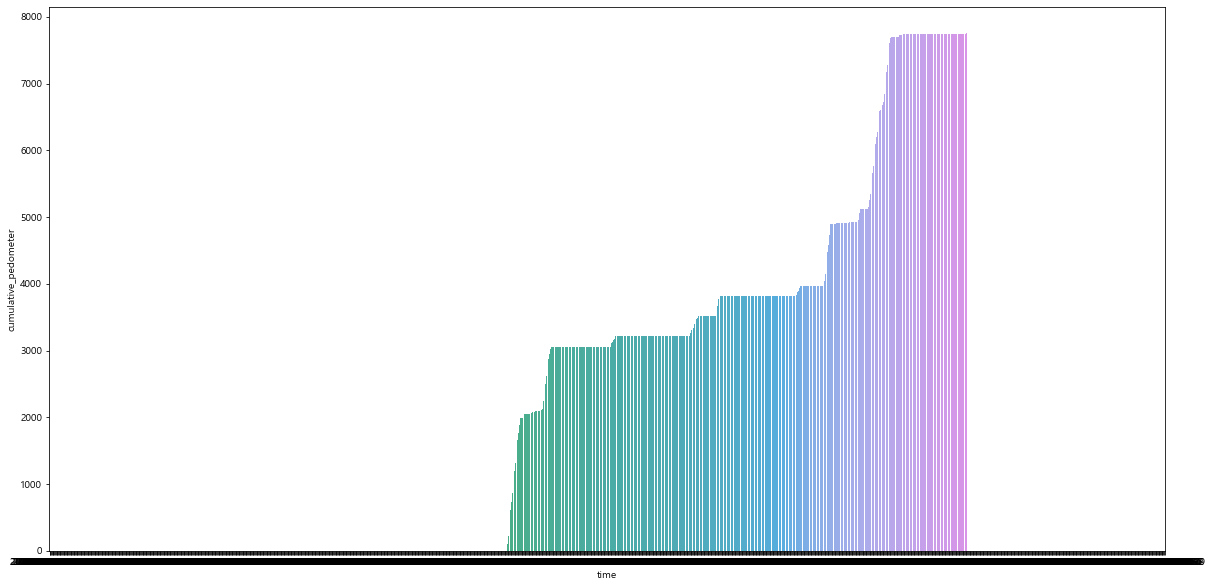

In [205]:
plt.figure(figsize=(20,10))
sns.barplot(data=result, x='time', y="cumulative_pedometer", ci=None)

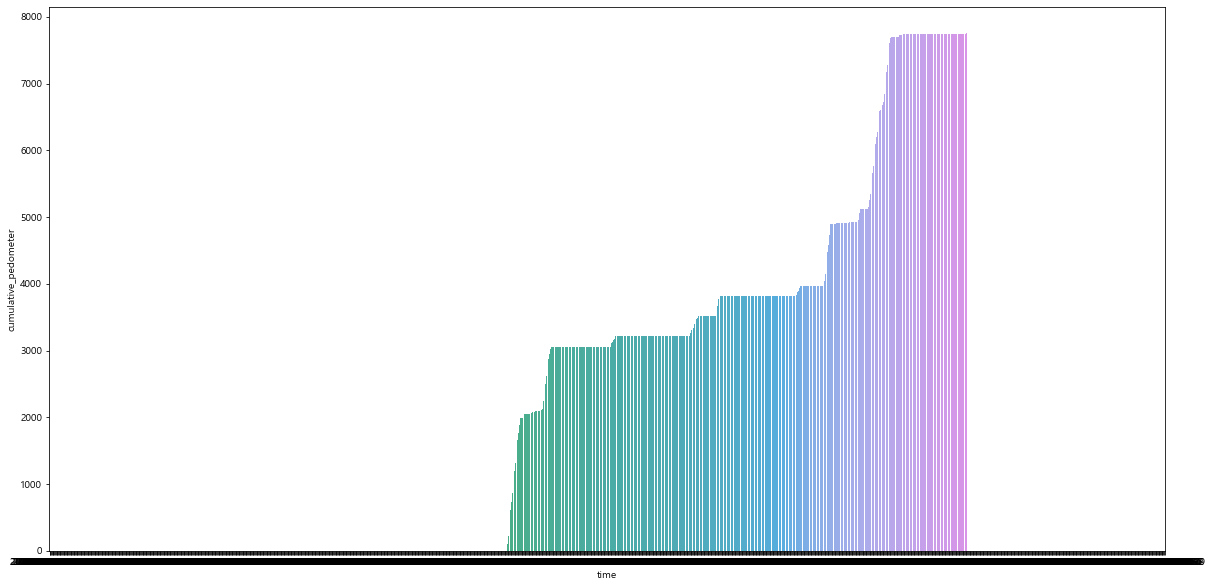

In [207]:
plt.figure(figsize=(20,10))
sns.barplot(data=result, x='time', y="cumulative_pedometer", ci=None)

In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def get_val():
    result = []
    base = [10,10]
    for i in range(24):
        result.append(base)

    return result

def get_labels():
    result = []
    for i in range(24):
        result.append(str(i) + '시')
    return result

In [13]:
result

,active_pedometer,cumulative_pedometer,pedometer,time
0,0.0,0.0,195.0,2020-08-09 00:00
1,0.0,0.0,195.0,2020-08-09 00:01
2,0.0,0.0,195.0,2020-08-09 00:02
3,0.0,0.0,195.0,2020-08-09 00:03
4,0.0,0.0,195.0,2020-08-09 00:04
...,...,...,...,...
1435,NaN,NaN,NaN,2020-08-09 23:55
1436,NaN,NaN,NaN,2020-08-09 23:56
1437,NaN,NaN,NaN,2020-08-09 23:57
1438,NaN,NaN,NaN,2020-08-09 23:58


In [11]:
import numpy as np

arr = np.empty((1), dtype=int)

# for i in range(10):
#     item = np.array([[i]])
#     arr = np.append(arr, item) 

arr = np.append(arr, np.arange(2)*10)
# arr = np.append(arr, np.arange(2))
# arr = np.append(arr, np.arange(5))
# arr = np.append(arr, np.arange(5))
# arr = np.append(arr, np.arange(5))


arr = np.delete(arr, [0], axis=0)

print(arr)
print(np.arange(3)*20)
# cmap?

test = [(0.0,  0.0, 0.0),
                       (0.25, 0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)]

test

[ 0 10]
[ 0 20 40]


[(0.0, 0.0, 0.0), (0.25, 0.0, 0.0), (0.75, 1.0, 1.0), (1.0, 1.0, 1.0)]

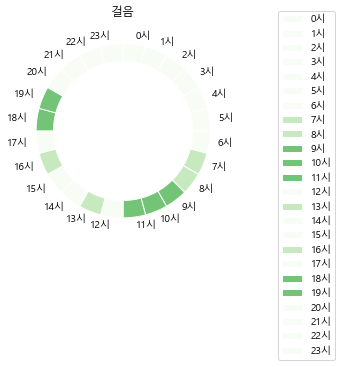

In [12]:
fig, ax = plt.subplots()
labels = get_labels()

size = 0.2
vals = np.array(get_val())

cmap = plt.get_cmap('Greens')

# outer_colors = cmap(seed)

# outer_colors = cmap(np.arange(3)*20)
# cmap은 0-1 사이의 색을 갖는다
outer_colors = cmap([0,0,0,0,0,0,0,0.25,0.25,0.5,0.5,0.5, 0, 0.25,0,0,0.25,0,0.5, 0.5, 0,0,0,0,0,0,0,0])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels = labels, startangle=90, counterclock=False,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='걸음')
plt.legend(labels, loc='right', bbox_to_anchor=(1.0, 0., 0.5, 0.5))
plt.show()


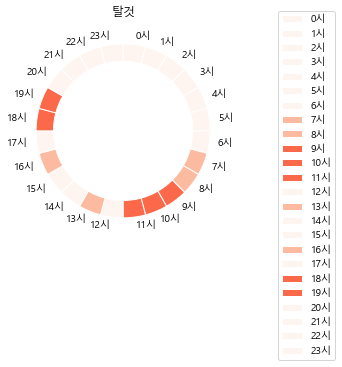

In [180]:
fig, ax = plt.subplots()
labels = get_labels()

size = 0.2
vals = np.array(get_val())

# cmap = plt.get_cmap("tab20c")
cmap = plt.get_cmap('Reds')


# outer_colors = cmap(seed)

# outer_colors = cmap(np.arange(3)*20)
outer_colors = cmap([0,0,0,0,0,0,0,0.25,0.25,0.5,0.5,0.5, 0, 0.25,0,0,0.25,0,0.5, 0.5, 0,0,0,0,0,0,0,0])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors, labels = labels, startangle=90, counterclock=False,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='탈것')
plt.legend(labels, loc='right', bbox_to_anchor=(1.0, 0., 0.5, 0.5))
plt.show()
